### Цель работы

Целью данной лабораторной работы является практическое изучение алгоритмов и методов регрессионного анализа. В ходе выполнения работы планируется исследовать различные подходы к построению регрессионных моделей и определить условия их оптимального применения на различных наборах данных.

### Задание

Лабораторная работа состоит из трёх основных частей.

**Часть 1 - Простая линейная регрессия**

Необходимо построить две модели простой линейной регрессии: первую для пары признаков x1-y, вторую - для x2-y. Для каждой модели требуется выполнить предсказание на тестовой выборке и оценить качество с использованием метрик MSE, MAE, RMSE и R². Также необходимо провести визуализацию результатов: построить графики рассеяния с линиями регрессии, графики остатков и графики сравнения предсказанных значений с истинными.

**Часть 2 - Полиномиальная регрессия**

В данной части необходимо определить, для какого из признаков (x1 или x2) целесообразно применение полиномиальной регрессии. Требуется протестировать модели с различными степенями полинома, оценить их качество и выбрать оптимальную степень. Важно проанализировать влияние степени полинома на способность модели к обобщению и избежать как недообучения, так и переобучения.

**Часть 3 - Решение задачи регрессии различными методами**

В третьей части работы предстоит решить практическую задачу прогнозирования заработной платы сотрудников на основе набора признаков. Этапы выполнения:
- Загрузка и первичный анализ данных
- Визуализация целевой переменной, обнаружение и обработка выбросов
- Построение матрицы диаграмм рассеяния для анализа взаимосвязей
- Разделение данных на обучающую и тестовую выборки
- Нормализация числовых признаков
- Обучение модели линейной регрессии и оценка её качества
- Анализ значимости признаков через коэффициенты модели
- Применение альтернативного метода (дерево решений) и сравнительный анализ результатов

По итогам работы необходимо сделать обоснованный вывод о применимости различных методов регрессии для данного типа задач.

### Описание предметной области

**Вариант 3**

Набор данных: ```salary.csv```

Описание столбцов:
- age — возраст сотрудника в годах.
- income — годовой доход до текущей работы.
- experience — количество полных лет профессионального опыта.
- score_test — результат прохождения профессионального теста
- hours_worked — среднее количество рабочих часов в неделю.
- distance_to_work — расстояние от дома до места работы.
- savings — сумма сбережений на банковском счёте.
- debt — общий объём текущих долгов (по кредитам, картам и другим
обязательствам, в долларах).
- education — уровень образования: «High School» (школа), «Bachelor»
(бакалавр), «Master» (магистр) или «PhD» (доктор наук).
- city — город проживания: Нью-Йорк, Лос-Анджелес, Чикаго, Хьюстон или
Финикс.
- job_type — сфера профессиональной деятельности: IT, финансы,
здравоохранение, образование или ритейл.
- marital_status — семейное положение: «Single» (холост/незамужем), «Married»
(в браке) или «Divorced» (в разводе).
- car — наличие автомобиля: «Yes» (есть) или «No» (нет).
- remote_work — работает ли сотрудник удалённо: «Yes» или «No».
- salary — годовая зарплата.

# Ход работы

### Часть 1 - Простая линейная регрессия

Загрузка и первичный анализ данных

#### 1.1. Загрузка и первичный анализ данных

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

data_reg = pd.read_excel('./regression.xlsx', sheet_name='var3')

print("Первые строки датасета:")
print(data_reg.head())

print("\nИнформация о типах данных и наличии пропусков:")
print(data_reg.info())

print("\nОписательная статистика:")
print(data_reg.describe())

Первые строки датасета:
         x1        x2         y
0  1.696315 -0.548550  0.870770
1 -0.560186  1.176442  0.539647
2  1.493260  0.386962  1.049902
3  0.162986 -1.232673 -1.490034
4  0.344845  0.740232  1.737131

Информация о типах данных и наличии пропусков:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      1000 non-null   float64
 1   x2      1000 non-null   float64
 2   y       1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB
None

Описательная статистика:
                x1           x2            y
count  1000.000000  1000.000000  1000.000000
mean      0.000007    -0.000038     0.483917
std       1.155357     1.155261     1.670779
min      -1.998745    -1.996808    -3.498375
25%      -0.998825    -0.999651    -0.774310
50%       0.000264     0.001129     0.434032
75%       0.997258     0.998857     1.741084
max       1.99

Анализ показывает отсутствие пропущенных значений и корректность типов данных. Данные готовы для дальнейшей обработки.

#### 1.2. Построение модели линейной регрессии для признака x1

Построение модели линейной регрессии для признака x1 и целевой переменной y

In [ ]:
X1_train, X1_test, y_train_1, y_test_1 = train_test_split(
    data_reg['x1'], data_reg['y'], 
    test_size=0.25, # 75/25
    random_state=42 # обеспечивает воспроизводимость результатов
)

model_x1 = LinearRegression()
model_x1.fit(X1_train.values.reshape(-1,1), y_train_1) # для совместимости со sklearn

y_pred_x1 = model_x1.predict(X1_test.values.reshape(-1,1))

comparison_x1 = pd.DataFrame({
    'Истинные значения': y_test_1.values,
    'Предсказанные значения': y_pred_x1
})
comparison_x1 = comparison_x1.reset_index(drop=True)

print("Первые 10 строк результатов предсказания для x1:")
comparison_x1.head(10)

Первые 10 строк результатов предсказания для x1:


Истинные значения  Предсказанные значения
0          -0.068690                0.486397
1           0.373671                0.397490
2          -1.625924                0.479487
3          -0.280631                0.444695
4           1.089776                0.395745
5          -2.158199                0.464911
6           0.561486                0.394545
7           1.837413                0.388816
8          -1.183537                0.441106
9           0.385483                0.453193

Анализ первых 10 предсказаний показывает значительные расхождения между истинными и предсказанными значениями. Можно предположить наличие слабой линейной зависимости между признаком x1 и целевой переменной y.

#### 1.3. Построение модели линейной регрессии для признака x2

Построение модели линейной регрессии для признака x2 и целевой переменной y

In [48]:
X2_train, X2_test, y_train_2, y_test_2 = train_test_split(
    data_reg['x2'], data_reg['y'], 
    test_size=0.25, 
    random_state=42
)

model_x2 = LinearRegression()
model_x2.fit(X2_train.values.reshape(-1,1), y_train_2)

y_pred_x2 = model_x2.predict(X2_test.values.reshape(-1,1))

comparison_x2 = pd.DataFrame({
    'Истинные значения': y_test_2.values,
    'Предсказанные значения': y_pred_x2
})
comparison_x2 = comparison_x2.reset_index(drop=True)

print("Первые 10 строк результатов предсказания для x2:")
comparison_x2.head(10)

Первые 10 строк результатов предсказания для x2:


Истинные значения  Предсказанные значения
0          -0.068690               -0.060952
1           0.373671               -0.438988
2          -1.625924               -1.519763
3          -0.280631               -0.614400
4           1.089776                0.859658
5          -2.158199               -1.721000
6           0.561486               -0.107841
7           1.837413               -0.917677
8          -1.183537               -1.429301
9           0.385483                1.277306

Здесь наблюдается значительно лучшее соответствие между предсказанными и истинными значениями, что свидетельствует о наличии выраженной линейной зависимости между признаком x2 и целевой переменной y.

#### 1.4. Оценка качества моделей с использованием метрик MSE, MAE, RMSE и R²

In [49]:
# X1
mse_for_x1 = mean_squared_error(y_test_1, y_pred_x1)
mae_for_x1 = mean_absolute_error(y_test_1, y_pred_x1)
rmse_for_x1 = np.sqrt(mse_for_x1)
r2_for_x1 = r2_score(y_test_1, y_pred_x1)

print("Метрики качества для модели x1")
print(f"MSE (среднеквадратичная ошибка): {mse_for_x1:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae_for_x1:.4f}")
print(f"RMSE (корень из MSE): {rmse_for_x1:.4f}")
print(f"R^2 (коэффициент детерминации): {r2_for_x1:.4f}")
print()

# X2
mse_for_x2 = mean_squared_error(y_test_2, y_pred_x2)
mae_for_x2 = mean_absolute_error(y_test_2, y_pred_x2)
rmse_for_x2 = np.sqrt(mse_for_x2)
r2_for_x2 = r2_score(y_test_2, y_pred_x2)

print("Метрики качества для модели x2")
print(f"MSE (среднеквадратичная ошибка): {mse_for_x2:.4f}")
print(f"MAE (средняя абсолютная ошибка): {mae_for_x2:.4f}")
print(f"RMSE (корень из MSE): {rmse_for_x2:.4f}")
print(f"R^2 (коэффициент детерминации): {r2_for_x2:.4f}")

Метрики качества для модели x1
MSE (среднеквадратичная ошибка): 3.0755
MAE (средняя абсолютная ошибка): 1.4552
RMSE (корень из MSE): 1.7537
R^2 (коэффициент детерминации): -0.0089

Метрики качества для модели x2
MSE (среднеквадратичная ошибка): 0.8236
MAE (средняя абсолютная ошибка): 0.6967
RMSE (корень из MSE): 0.9075
R^2 (коэффициент детерминации): 0.7298


Полученные результаты позволяют сделать следующие выводы:

**Модель с использованием признака x1:**
- Отрицательное значение коэффициента детерминации (R² ≈ -0.009) указывает на то, что модель работает хуже базового предсказания среднего значения
- Высокие значения ошибок (MSE ≈ 3.08, MAE ≈ 1.46) подтверждают отсутствие значимой линейной зависимости между x1 и y

**Модель с использованием признака x2:**
- Коэффициент детерминации R² ≈ 0.73 свидетельствует о том, что модель объясняет около 73% дисперсии целевой переменной
- Существенно более низкие значения ошибок (MSE ≈ 0.82, MAE ≈ 0.70) указывают на наличие выраженной линейной зависимости между x2 и y
- Признак x2 демонстрирует значительно более высокую информативность по сравнению с x1

#### 1.5. Коэффициенты линейной регрессии и уравнения моделей

Вывод коэффициентов линейной регрессии

In [50]:
slope_x1 = model_x1.coef_[0]
intercept_x1 = model_x1.intercept_

print("Коэффициенты модели для x1:")
print(f"  Наклон (a): {slope_x1:.4f}")
print(f"  Свободный член (b): {intercept_x1:.4f}")
print(f"  Уравнение регрессии: y = {slope_x1:.4f} * x1 + {intercept_x1:.4f}")

slope_x2 = model_x2.coef_[0]
intercept_x2 = model_x2.intercept_

print("\nКоэффициенты модели для x2:")
print(f"  Наклон (a): {slope_x2:.4f}")
print(f"  Свободный член (b): {intercept_x2:.4f}")
print(f"  Уравнение регрессии: y = {slope_x2:.4f} * x2 + {intercept_x2:.4f}")

Коэффициенты модели для x1:
  Наклон (a): -0.0320
  Свободный член (b): 0.4503
  Уравнение регрессии: y = -0.0320 * x1 + 0.4503

Коэффициенты модели для x2:
  Наклон (a): 1.2168
  Свободный член (b): 0.4599
  Уравнение регрессии: y = 1.2168 * x2 + 0.4599


#### 1.6. Визуализация линий регрессии

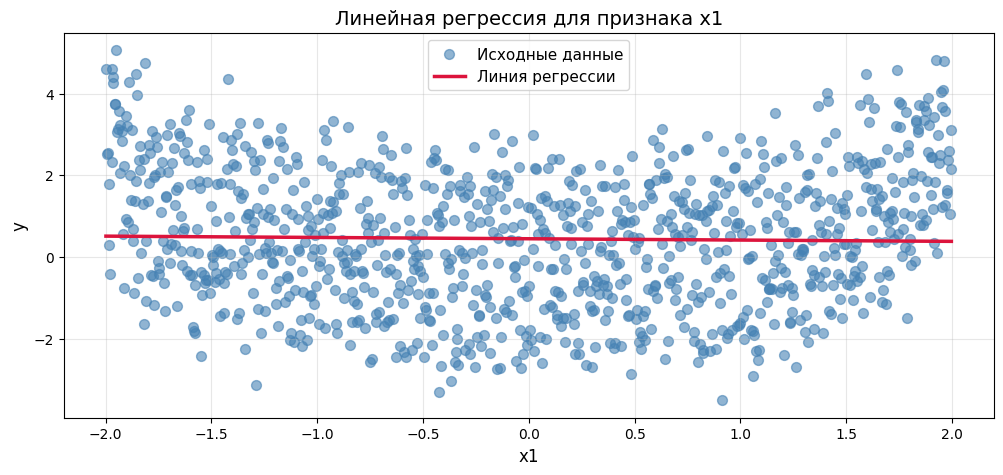

In [51]:
plt.figure(figsize=(12, 5))

plt.scatter(data_reg['x1'], data_reg['y'], color='steelblue', alpha=0.6, 
            s=50, label='Исходные данные')

# линия регрессии
x_min, x_max = data_reg['x1'].min(), data_reg['x1'].max()
y_line_start = slope_x1 * x_min + intercept_x1
y_line_end = slope_x1 * x_max + intercept_x1

plt.plot([x_min, x_max], [y_line_start, y_line_end], 
         color='crimson', linewidth=2.5, label='Линия регрессии')

plt.xlabel('x1', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Линейная регрессия для признака x1', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.show()

График демонстрирует практически горизонтальную линию регрессии с минимальным наклоном. Значительный разброс точек относительно линии подтверждает отсутствие выраженной линейной зависимости между признаком x1 и целевой переменной.

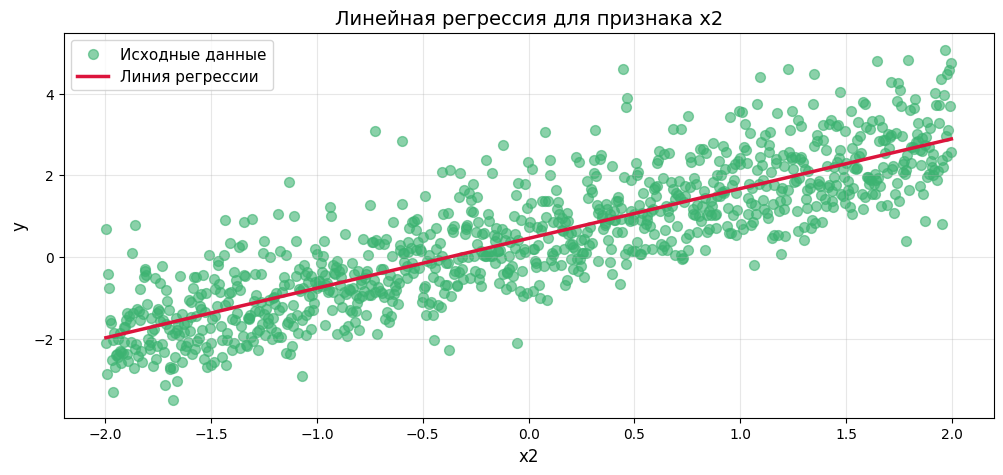

In [52]:
plt.figure(figsize=(12, 5))

plt.scatter(data_reg['x2'], data_reg['y'], color='mediumseagreen', alpha=0.6, 
            s=50, label='Исходные данные')

x2_min, x2_max = data_reg['x2'].min(), data_reg['x2'].max()
y2_line_start = slope_x2 * x2_min + intercept_x2
y2_line_end = slope_x2 * x2_max + intercept_x2

plt.plot([x2_min, x2_max], [y2_line_start, y2_line_end], 
         color='crimson', linewidth=2.5, label='Линия регрессии')

plt.xlabel('x2', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Линейная регрессия для признака x2', fontsize=14)
plt.legend(fontsize=11)
plt.grid(alpha=0.3)
plt.show()

На графике наблюдается выраженная группировка точек вдоль линии регрессии. Заметен чёткий положительный тренд - рост значения x2 сопровождается увеличением y, что свидетельствует о наличии линейной зависимости между переменными.

#### 1.7. Анализ остатков моделей

Анализ остатков регрессионных моделей

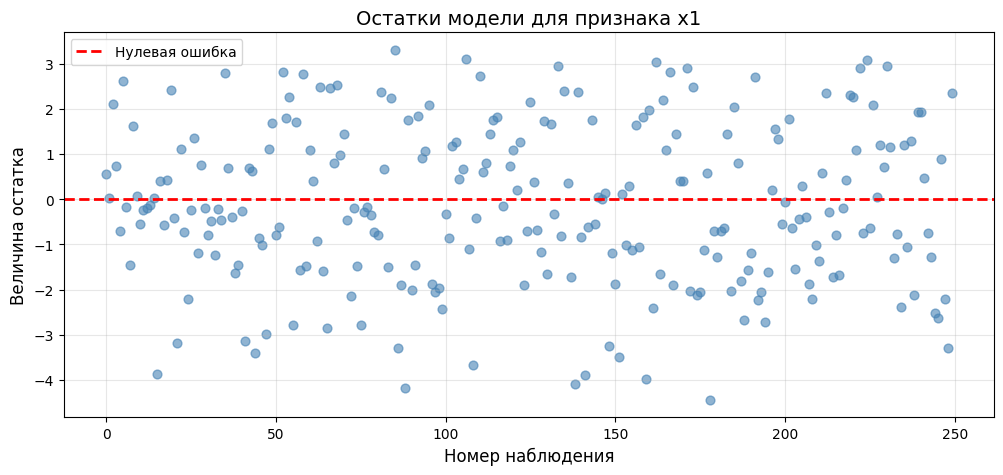

In [53]:
# остатки-разности между предсказанными и истинными значениями
errors_x1 = y_pred_x1 - y_test_1.values
errors_x2 = y_pred_x2 - y_test_2.values

plt.figure(figsize=(12, 5))
plt.scatter(range(len(errors_x1)), errors_x1, alpha=0.6, color='steelblue', s=40)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нулевая ошибка')
plt.xlabel('Номер наблюдения', fontsize=12)
plt.ylabel('Величина остатка', fontsize=12)
plt.title('Остатки модели для признака x1', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

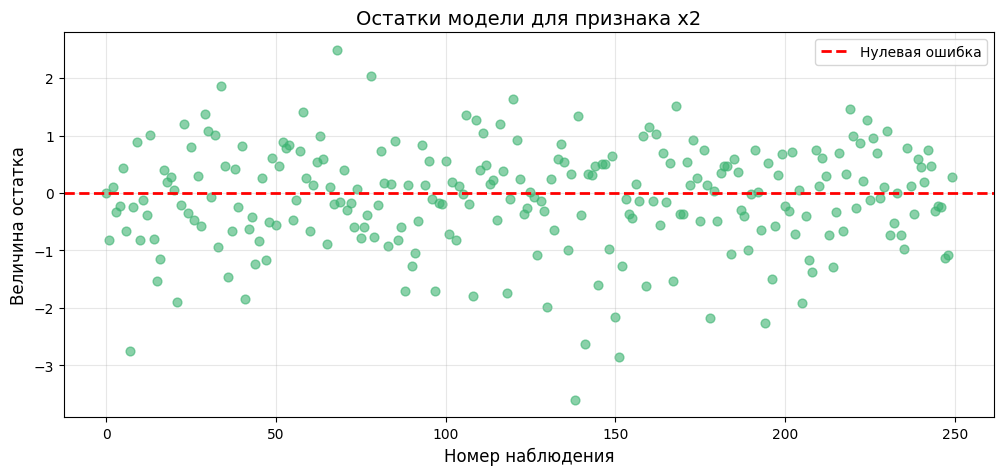

In [54]:
plt.figure(figsize=(12, 5))
plt.scatter(range(len(errors_x2)), errors_x2, alpha=0.6, color='mediumseagreen', s=40)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2, label='Нулевая ошибка')
plt.xlabel('Номер наблюдения', fontsize=12)
plt.ylabel('Величина остатка', fontsize=12)
plt.title('Остатки модели для признака x2', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Анализ графиков остатков показывает существенный разброс ошибок для модели x1, при этом точки значительно удалены от нулевой линии. Для модели x2 наблюдается более компактное распределение остатков относительно нуля, хотя присутствуют отдельные выбросы. Это может указывать на наличие нелинейных компонент в зависимости, не учитываемых линейной моделью.

#### 1.8. Сравнение предсказанных и истинных значений

Графики сравнения предсказанных и истинных значений

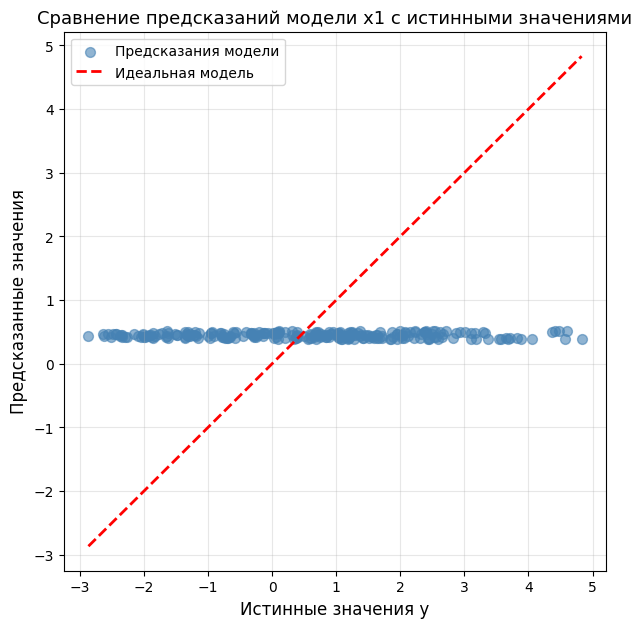

In [55]:
plt.figure(figsize=(7, 7))

plt.scatter(y_test_1, y_pred_x1, alpha=0.6, color='steelblue', s=50, 
            label='Предсказания модели')
# Диаго. под 45 градусов представляет идеальные предсказания
min_val, max_val = y_test_1.min(), y_test_1.max()
plt.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label='Идеальная модель')

plt.xlabel('Истинные значения y', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение предсказаний модели x1 с истинными значениями', fontsize=13)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

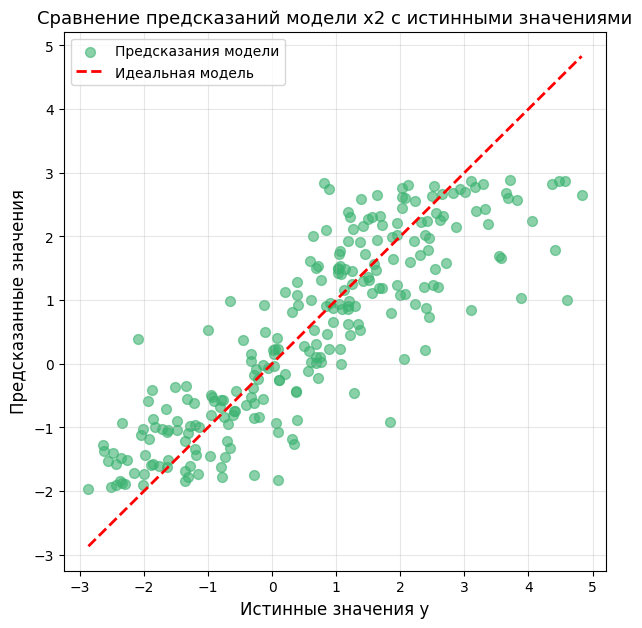

In [56]:
plt.figure(figsize=(7, 7))

plt.scatter(y_test_2, y_pred_x2, alpha=0.6, color='mediumseagreen', s=50, 
            label='Предсказания модели')
min_val2, max_val2 = y_test_2.min(), y_test_2.max()
plt.plot([min_val2, max_val2], [min_val2, max_val2], 
         'r--', linewidth=2, label='Идеальная модель')

plt.xlabel('Истинные значения y', fontsize=12)
plt.ylabel('Предсказанные значения', fontsize=12)
plt.title('Сравнение предсказаний модели x2 с истинными значениями', fontsize=13)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Для модели x1 наблюдается практически полное отсутствие соответствия между предсказаниями и истинными значениями - точки не образуют диагональную структуру. Модель генерирует близкие предсказания для широкого диапазона истинных значений y. Напротив, для модели x2 точки демонстрируют выраженную группировку вдоль диагонали идеального предсказания, хотя присутствует определённый разброс.

**Выводы:**

Проведённый анализ простой линейной регрессии выявил существенные различия в предсказательной способности моделей, построенных на разных признаках:

1. Модель с использованием признака x1 продемонстрировала крайне низкое качество. Отрицательное значение коэффициента детерминации свидетельствует о том, что данная модель уступает по точности простому усреднению. Можно предположить либо полное отсутствие связи между x1 и y, либо наличие сильной нелинейной зависимости.

2. Модель на основе признака x2 показала удовлетворительные результаты с коэффициентом детерминации около 0.73, что указывает на способность модели объяснять значительную часть вариации целевой переменной. Тем не менее, присутствие заметных ошибок предсказания может свидетельствовать о целесообразности применения более сложных моделей.

3. Визуальный анализ оказался эффективным инструментом для оценки качества моделей, наглядно продемонстрировав области их работоспособности и ограничения.

Дальнейший анализ предполагает исследование возможности улучшения результатов для признака x1 посредством применения полиномиальной регрессии.

### Часть 2 - Полиномиальная регрессия

#### 2.1. Обоснование выбора признака для полиномиальной регрессии

**Обоснование выбора признака для полиномиальной регрессии**

Для построения модели полиномиальной регрессии был выбран признак x1. Данное решение обусловлено несколькими соображениями. 

Во-первых, линейная модель для x1 продемонстрировала отрицательный коэффициент детерминации (около -0.0089), что указывает на полное отсутствие линейной зависимости между x1 и y. Полиномиальная регрессия наиболее эффективна именно в случаях, когда простая линейная модель не способна адекватно описать взаимосвязь между переменными.

Во-вторых, признак x2 уже показал хорошие результаты в рамках линейной модели, поэтому применение к нему полиномиальной регрессии может не дать существенного улучшения. С точки зрения демонстрации возможностей метода, более показательным является применение полиномиальной регрессии к x1.

Таким образом, если полиномиальная модель значительно улучшит результаты для x1, это станет убедительным подтверждением наличия нелинейной зависимости в данных.

#### 2.2. Построение полиномиальной регрессии степени 16

In [57]:
# PolynomialFeatures создаёт новые признаки: x, x^2, x^3, ..., x^16
# после применяется лин. регрессия

poly_transformer_16 = PolynomialFeatures(degree=16, include_bias=True)

X1_poly_train_16 = poly_transformer_16.fit_transform(X1_train.values.reshape(-1, 1))
X1_poly_test_16 = poly_transformer_16.transform(X1_test.values.reshape(-1, 1))

poly_model_16 = LinearRegression()
poly_model_16.fit(X1_poly_train_16, y_train_1)

y_poly_pred_16 = poly_model_16.predict(X1_poly_test_16)

mae_poly_16 = mean_absolute_error(y_test_1, y_poly_pred_16)
r2_poly_16 = r2_score(y_test_1, y_poly_pred_16)

print("Результаты полиномиальной регрессии степени 16:")
print(f"MAE: {mae_poly_16:.4f}")
print(f"R²: {r2_poly_16:.4f}")

Результаты полиномиальной регрессии степени 16:
MAE: 1.3303
R²: 0.1966


Коэффициент детерминации изменился с отрицательного значения на положительное, что свидетельствует о значительном улучшении качества модели. Однако высокая степень полинома может приводить к переобучению модели. Для проверки данного предположения необходим визуальный анализ полученной кривой.

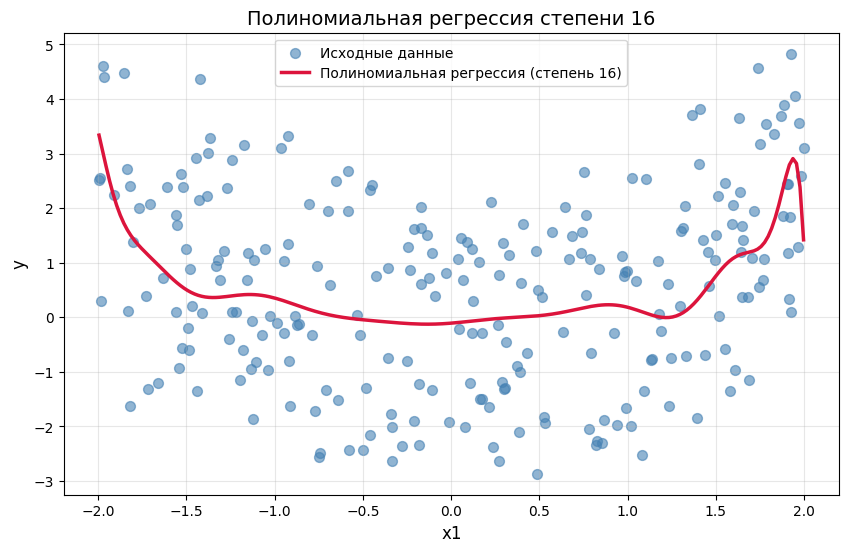

In [58]:
plt.figure(figsize=(10, 6))

plt.scatter(X1_test, y_test_1, color='steelblue', alpha=0.6, s=50, 
            label='Исходные данные')

# создание плотной сетки точек для визуализации гладкой кривой
x_range_dense = np.linspace(X1_test.min(), X1_test.max(), 200)
x_range_poly = poly_transformer_16.transform(x_range_dense.reshape(-1, 1))
y_curve_16 = poly_model_16.predict(x_range_poly)

plt.plot(x_range_dense, y_curve_16, color='crimson', linewidth=2.5, 
         label='Полиномиальная регрессия (степень 16)')

plt.xlabel('x1', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Полиномиальная регрессия степени 16', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

График демонстрирует избыточную сложность полученной кривой с многочисленными осцилляциями. Модель стремится пройти через отдельные кластеры точек, что является признаком переобучения. В данном случае модель запоминает особенности обучающей выборки вместо выявления общих закономерностей, что снижает её способность к обобщению на новых данных.

Целесообразно рассмотреть модель с меньшей степенью полинома.

#### 2.3. Построение полиномиальной регрессии степени 7

Построение полиномиальной регрессии степени 7

In [59]:
poly_transformer_7 = PolynomialFeatures(degree=7, include_bias=True)

X1_poly_train_7 = poly_transformer_7.fit_transform(X1_train.values.reshape(-1, 1))
X1_poly_test_7 = poly_transformer_7.transform(X1_test.values.reshape(-1, 1))

poly_model_7 = LinearRegression()
poly_model_7.fit(X1_poly_train_7, y_train_1)

y_poly_pred_7 = poly_model_7.predict(X1_poly_test_7)

mae_poly_7 = mean_absolute_error(y_test_1, y_poly_pred_7)
r2_poly_7 = r2_score(y_test_1, y_poly_pred_7)

print("Результаты полиномиальной регрессии степени 7:")
print(f"MAE: {mae_poly_7:.4f}")
print(f"R²: {r2_poly_7:.4f}")

Результаты полиномиальной регрессии степени 7:
MAE: 1.3172
R²: 0.2153


Метрики качества модели со степенью 7 превосходят результаты модели степени 16: наблюдается более высокое значение R² при одновременном снижении MAE. Это свидетельствует о лучшем балансе между сложностью модели и её способностью к обобщению.

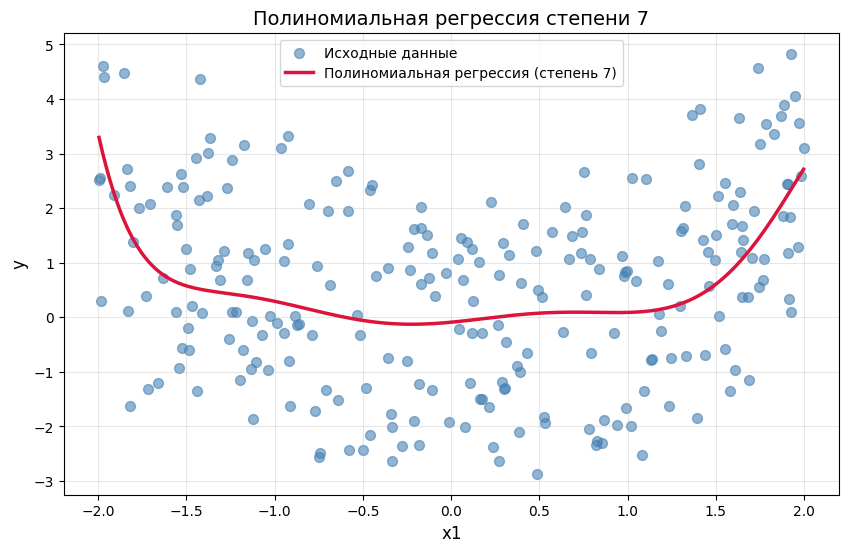

In [60]:
plt.figure(figsize=(10, 6))

plt.scatter(X1_test, y_test_1, color='steelblue', alpha=0.6, s=50, 
            label='Исходные данные')

x_range_dense = np.linspace(X1_test.min(), X1_test.max(), 200)
x_range_poly_7 = poly_transformer_7.transform(x_range_dense.reshape(-1, 1))
y_curve_7 = poly_model_7.predict(x_range_poly_7)

plt.plot(x_range_dense, y_curve_7, color='crimson', linewidth=2.5, 
         label='Полиномиальная регрессия (степень 7)')

plt.xlabel('x1', fontsize=12)
plt.ylabel('y', fontsize=12)
plt.title('Полиномиальная регрессия степени 7', fontsize=14)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Полученная кривая характеризуется значительно более плавной формой по сравнению с моделью степени 16. Сохраняя необходимую гибкость для улавливания общего тренда данных, модель избегает избыточных осцилляций. Наблюдается приемлемая группировка точек относительно кривой регрессии.

**Выводы по полиномиальной регрессии:**

Проведённое исследование различных степеней полинома позволяет сделать следующие выводы:

1. Полином степени 7 продемонстрировал оптимальные характеристики для данного набора данных. Модель обеспечивает наилучшее соотношение метрик качества (R² ≈ 0.22, MAE ≈ 1.32) при визуально адекватной форме кривой без избыточной сложности.

2. Полином степени 16 демонстрирует признаки переобучения. Несмотря на формальное обучение модели, полученная кривая характеризуется избыточной сложностью и подстройкой под шумовые компоненты данных, что негативно скажется на обобщающей способности модели при работе с новыми данными.

3. Общие принципы выбора степени полинома:
   - Недостаточная степень (1-2) может не обеспечить улавливание нелинейных зависимостей (недообучение)
   - Избыточная степень (15+) приводит к запоминанию индивидуальных особенностей обучающей выборки (переобучение)
   - Оптимальная степень обычно находится в диапазоне 3-10, однако требует эмпирической проверки для конкретного набора данных

4. Следует отметить, что даже при оптимальной степени полинома признак x1 существенно уступает по качеству признаку x2 с простой линейной регрессией (R² около 0.22 против 0.73). Это указывает на принципиально меньшую информативность признака x1 независимо от применяемой модели.

### Часть 3 - Решение задачи регрессии различными методами


#### 3.1. Загрузка и первичный анализ данных о заработной плате

Загрузка и первичный анализ данных о заработной плате

In [61]:
salary_data = pd.read_csv('./salary.csv')

print("Общая информация о датасете")
print(salary_data.info())
print("\nОписательная статистика числовых признаков")
print(salary_data.describe())

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1500 non-null   int64  
 1   income            1500 non-null   float64
 2   experience        1500 non-null   int64  
 3   score_test        1500 non-null   float64
 4   hours_worked      1500 non-null   int64  
 5   distance_to_work  1500 non-null   float64
 6   savings           1500 non-null   float64
 7   debt              1500 non-null   float64
 8   education         1500 non-null   object 
 9   city              1500 non-null   object 
 10  job_type          1500 non-null   object 
 11  marital_status    1500 non-null   object 
 12  car               1500 non-null   object 
 13  remote_work       1500 non-null   object 
 14  salary            1500 non-null   float64
dtypes: float64(6), int64(3), object(6)
memory usage: 175.9+ KB
No

Первичный анализ свидетельствует об отсутствии пропущенных значений и корректности типов данных. Наблюдается значительная вариация в значениях заработной платы. Структура данных не требует переименования столбцов.

#### 3.2. Проверка на наличие дубликатов

In [62]:
duplicate_count = salary_data.duplicated().sum()
print(f"Обнаружено полных дубликатов: {duplicate_count}")

Обнаружено полных дубликатов: 0


Дубликаты отсутствуют. Далее необходимо проверить категориальные признаки на наличие неявных дубликатов (различия в пробелах, регистре и т.д.).

In [63]:
categorical_cols = ['education', 'city', 'job_type', 'marital_status', 'car', 'remote_work']

for col in categorical_cols:
    print(f"\nУникальные значения в столбце {col}:")
    print(salary_data[col].unique())


Уникальные значения в столбце education:
['PhD' 'High School' 'Bachelor' 'Master']

Уникальные значения в столбце city:
['Chicago' 'Houston' 'Los Angeles' 'Phoenix' 'New York']

Уникальные значения в столбце job_type:
['Finance' 'Retail' 'IT' 'Healthcare' 'Education']

Уникальные значения в столбце marital_status:
['Single' 'Married' 'Divorced']

Уникальные значения в столбце car:
['Yes' 'No']

Уникальные значения в столбце remote_work:
['Yes' 'No']


Категориальные признаки не содержат неявных дубликатов или некорректных значений.

#### 3.3. Визуализация целевой переменной

В качестве целевой переменной выбран признак `salary` (годовая заработная плата). Необходимо провести визуальный анализ распределения целевой переменной.

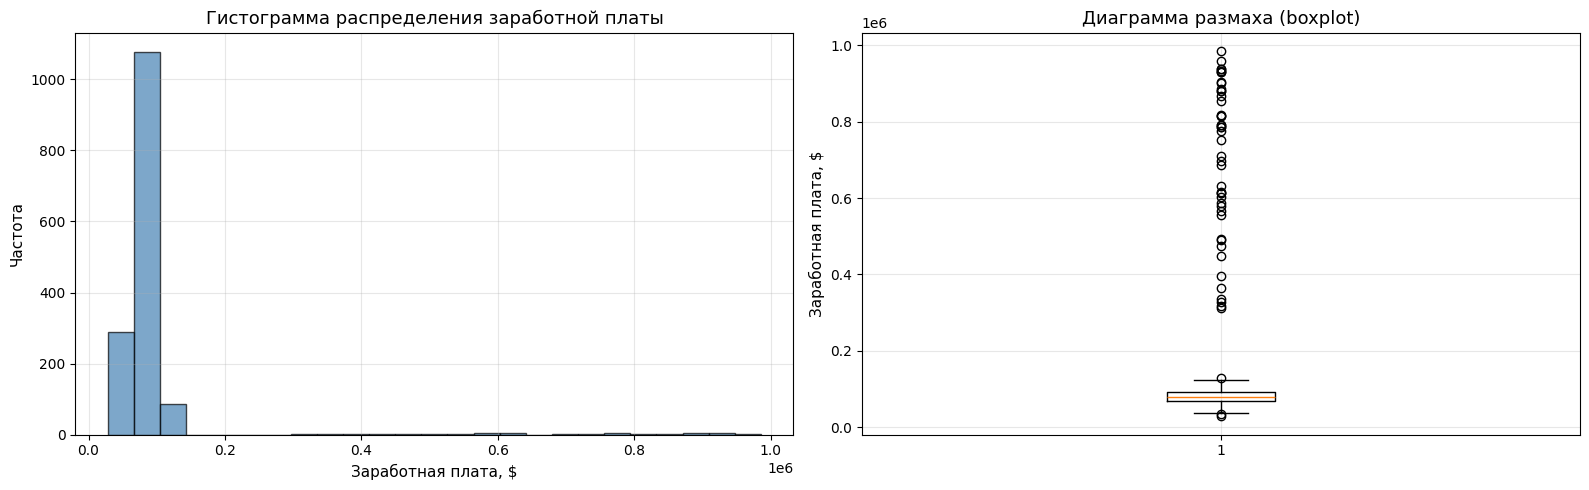

In [64]:
target_col = 'salary'

fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# гистограмма распределения
axes[0].hist(salary_data[target_col], bins=25, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].set_title('Гистограмма распределения заработной платы', fontsize=13)
axes[0].set_xlabel('Заработная плата, $', fontsize=11)
axes[0].set_ylabel('Частота', fontsize=11)
axes[0].grid(alpha=0.3)

# диаграмма размаха для выявления выбросов
axes[1].boxplot(salary_data[target_col], vert=True)
axes[1].set_title('Диаграмма размаха (boxplot)', fontsize=13)
axes[1].set_ylabel('Заработная плата, $', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

Гистограмма демонстрирует концентрацию основной массы значений в диапазоне до $200,000 с характерным убыванием частоты при увеличении заработной платы.

Диаграмма размаха выявляет наличие множественных выбросов как в верхней, так и в нижней частях распределения. Данные выбросы могут оказывать значительное влияние на параметры регрессионной модели, что требует их обработки.

#### 3.4. Обработка выбросов методом межквартильного размаха (IQR)

Обработка выбросов методом межквартильного размаха (IQR)

Нижняя граница: $36501.06
Верхняя граница: $124718.65

Исходное количество записей: 1500
Количество записей после очистки: 1452
Удалено записей: 48


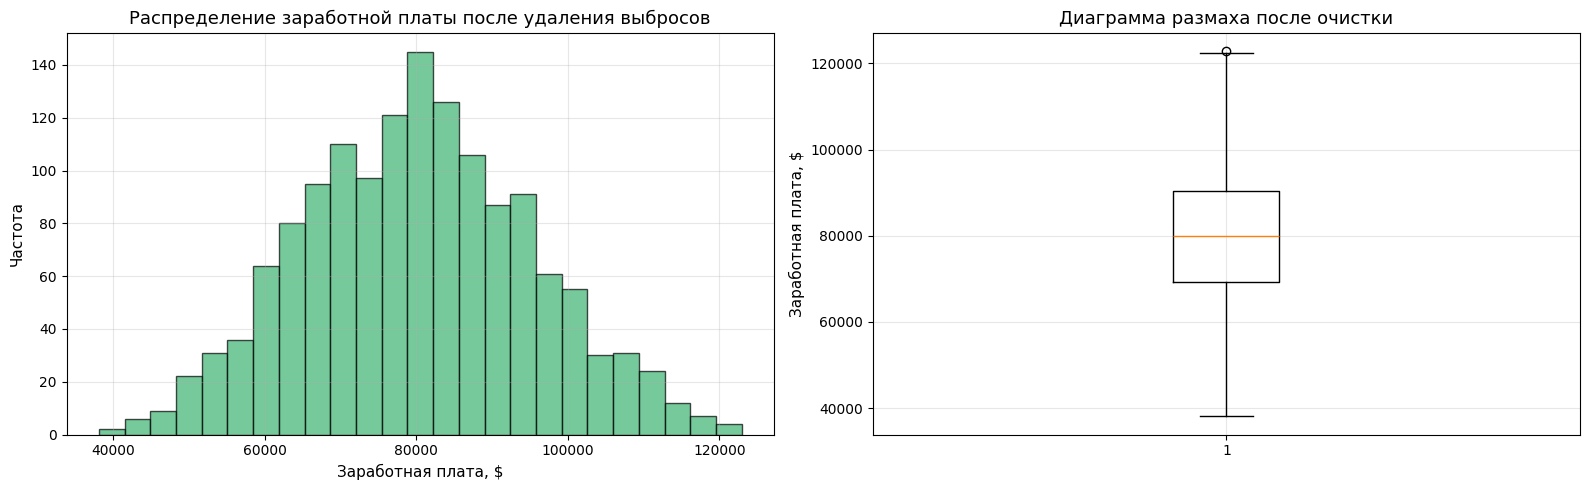

In [65]:
# вычисление квартилей и межквартильного размаха
Q1_salary = salary_data[target_col].quantile(0.25)
Q3_salary = salary_data[target_col].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

# определение границ для выявления выбросов
lower_limit = Q1_salary - 1.5 * IQR_salary
upper_limit = Q3_salary + 1.5 * IQR_salary

print(f"Нижняя граница: ${lower_limit:.2f}")
print(f"Верхняя граница: ${upper_limit:.2f}")

# удаление выбросов
salary_cleaned = salary_data[
    (salary_data[target_col] >= lower_limit) & 
    (salary_data[target_col] <= upper_limit)
].copy()

print(f"\nИсходное количество записей: {len(salary_data)}")
print(f"Количество записей после очистки: {len(salary_cleaned)}")
print(f"Удалено записей: {len(salary_data) - len(salary_cleaned)}")

# визуализация распределения после удаления выбросов
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

axes[0].hist(salary_cleaned[target_col], bins=25, edgecolor='black', alpha=0.7, color='mediumseagreen')
axes[0].set_title('Распределение заработной платы после удаления выбросов', fontsize=13)
axes[0].set_xlabel('Заработная плата, $', fontsize=11)
axes[0].set_ylabel('Частота', fontsize=11)
axes[0].grid(alpha=0.3)

axes[1].boxplot(salary_cleaned[target_col], vert=True)
axes[1].set_title('Диаграмма размаха после очистки', fontsize=13)
axes[1].set_ylabel('Заработная плата, $', fontsize=11)
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

После удаления выбросов распределение заработной платы приобрело более нормализованную форму. Гистограмма демонстрирует приближение к колоколообразному распределению, а диаграмма размаха не содержит экстремальных значений. Следует отметить, что обработка выбросов привела к уменьшению объёма выборки, однако это способствует повышению качества обучения модели.

#### 3.5. Построение матрицы диаграмм рассеяния

<Figure size 1500x1200 with 0 Axes>

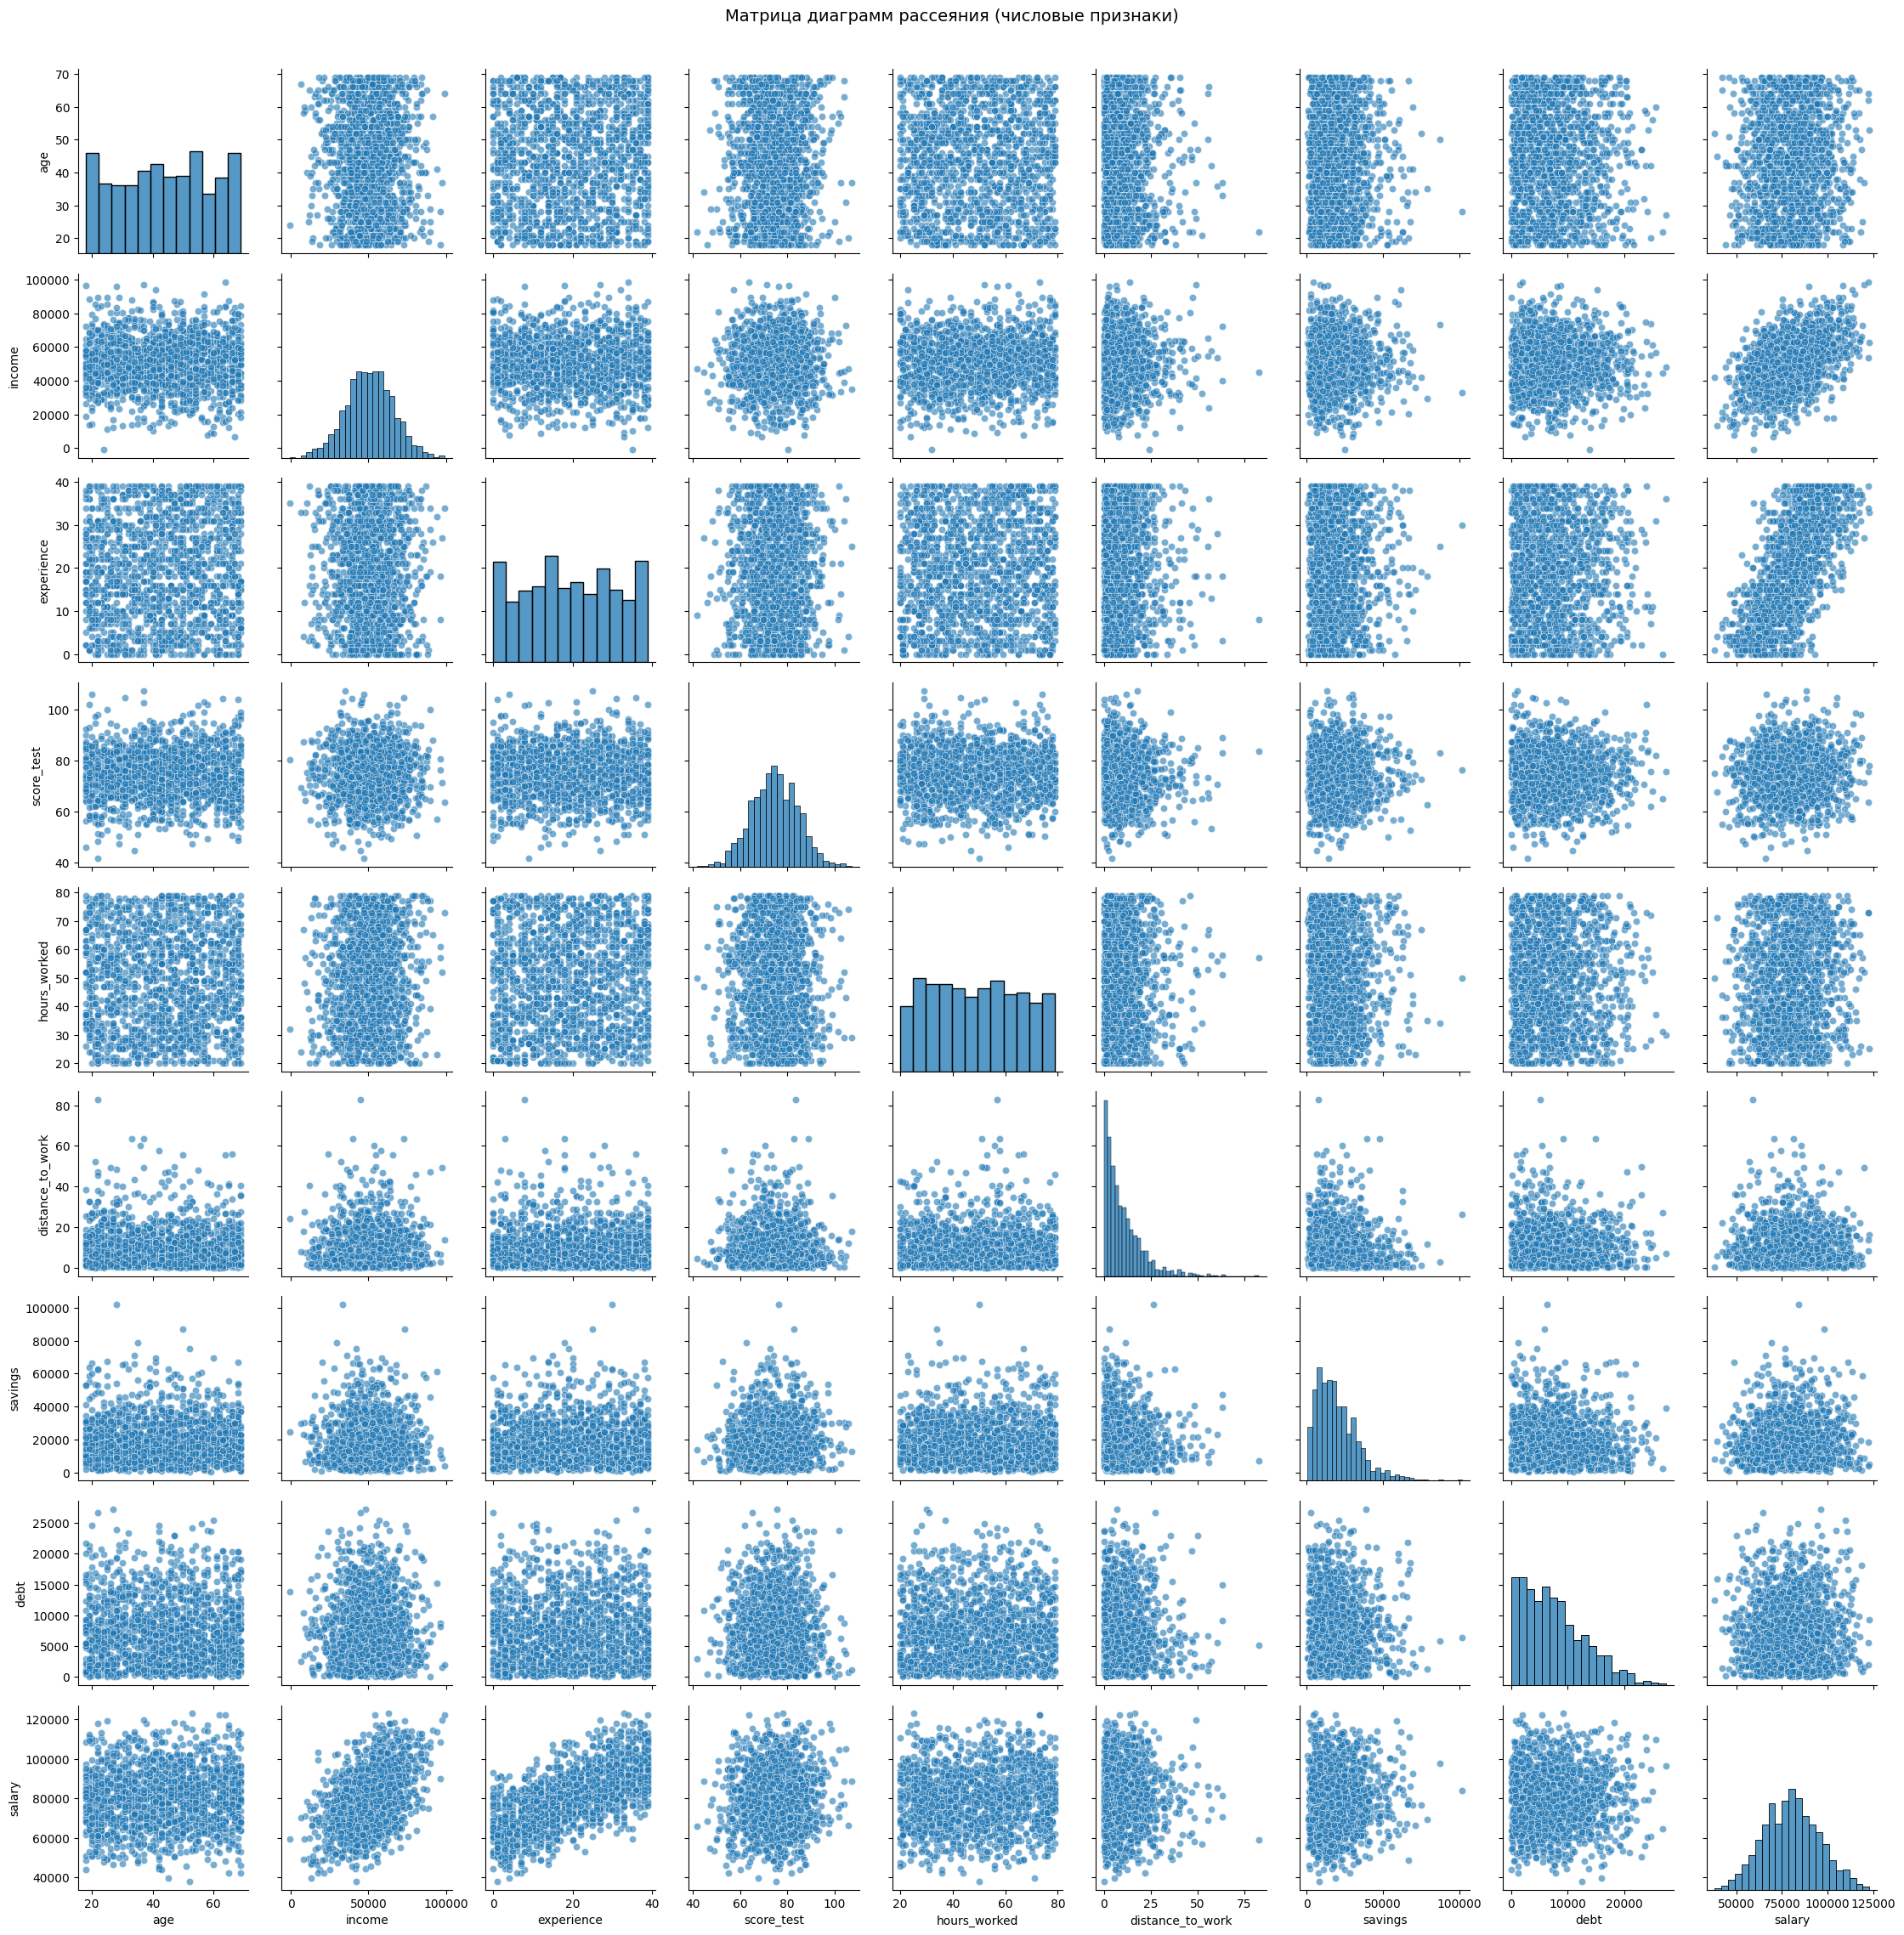

In [66]:
# pairplot - матрица графиков рассеяния для всех числовых признаков
plt.figure(figsize=(15, 12))
sns.pairplot(salary_cleaned, diag_kind='hist', plot_kws={'alpha': 0.6})
plt.suptitle('Матрица диаграмм рассеяния (числовые признаки)', y=1.01, fontsize=14)
plt.tight_layout()
plt.show()

Матрица рассеяния даёт много полезной информации. В столбце `salary` видно, что с `experience` и `income` есть явная положительная связь — чем больше опыт и предыдущий доход, тем выше зарплата. С некоторыми другими признаками связь слабее.

In [67]:
# отделение признаков от цел. var
features = salary_cleaned.drop('salary', axis=1)
target = salary_cleaned['salary']

numeric_cols = features.select_dtypes(include=[np.number]).columns
features_numeric = features[numeric_cols]

print(f"Работа с признаками: {list(numeric_cols)}")

# разделение на train и tes
X_train_sal, X_test_sal, y_train_sal, y_test_sal = train_test_split(
    features_numeric,
    target,
    test_size=0.25,
    random_state=42  # для воспроизводимости
)

# StandardScaler приводит всё к единому масштабу (среднее=0, std=1) - нормализация
normalizer = StandardScaler()
X_train_scaled = normalizer.fit_transform(X_train_sal)
X_test_scaled = normalizer.transform(X_test_sal)  # важно: fit только на train!

# лин. регрессия
lin_reg_model = LinearRegression()
lin_reg_model.fit(X_train_scaled, y_train_sal)

# предсказания
y_pred_linreg = lin_reg_model.predict(X_test_scaled)

# считаю метрики
mae_linreg = mean_absolute_error(y_test_sal, y_pred_linreg)
mse_linreg = mean_squared_error(y_test_sal, y_pred_linreg)
rmse_linreg = np.sqrt(mse_linreg)
r2_linreg = r2_score(y_test_sal, y_pred_linreg)

print("\nМетрики линейной регрессии")
print(f"MAE: ${mae_linreg:.2f}")
print(f"MSE: {mse_linreg:.2f}")
print(f"RMSE: ${rmse_linreg:.2f}")
print(f"R²: {r2_linreg:.4f}")

Работа с признаками: ['age', 'income', 'experience', 'score_test', 'hours_worked', 'distance_to_work', 'savings', 'debt']

Метрики линейной регрессии
MAE: $6794.74
MSE: 72722592.10
RMSE: $8527.75
R²: 0.7261


R² = 0.73. Модель объясняет 73% вариации в зарплатах. Средняя ошибка (MAE) всё равно ощутимая — в районе нескольких тысяч долларов. Для реального применения это может быть критично.

#### 3.6. Разделение данных на обучающую и тестовую выборки, нормализация и обучение модели линейной регрессии

In [68]:
predictions_table = pd.DataFrame({
    'Реальная зарплата': y_test_sal.values,
    'Предсказанная зарплата': y_pred_linreg
})
predictions_table = predictions_table.reset_index(drop=True)

print("Сравнение первых 10 предсказаний:")
predictions_table.head(10)

Сравнение первых 10 предсказаний:


Реальная зарплата  Предсказанная зарплата
0       90772.277599            92189.349205
1       84475.346122            80664.689101
2       67777.676332            67513.638441
3      110650.659849            96939.786271
4       68551.168300            71145.729992
5       79324.467916            70303.154169
6       59571.086625            53742.206312
7       90409.785269            90979.508973
8       92280.580124            93217.254135
9       79311.102051            78827.800605

#### 3.7. Сравнение предсказаний с реальными значениями

In [69]:
coefficients_table = pd.DataFrame({
    'Признак': numeric_cols,
    'Коэффициент': lin_reg_model.coef_
})
coefficients_table['Важность (abs)'] = coefficients_table['Коэффициент'].abs()
coefficients_table = coefficients_table.sort_values('Важность (abs)', ascending=False)

print("Коэффициенты признаков (отсортированы по важности):")
coefficients_table[['Признак', 'Коэффициент']]

Коэффициенты признаков (отсортированы по важности):


Признак   Коэффициент
2        experience  10012.912801
1            income   7166.651173
3        score_test   1167.827777
4      hours_worked    331.755287
0               age    266.116065
7              debt   -261.729231
5  distance_to_work     76.283284
6           savings     30.299437

#### 3.8. Анализ коэффициентов модели и значимости признаков

**Разбор коэффициентов**:

Самое интересное в этой табличке — какие признаки реально влияют на зарплату:

- **`experience` и `income`** имеют самые большие положительные коэффициенты. Неудивительно — чем больше опыта и выше был доход на прошлой работе, тем больше платят сейчас. Это логика рынка труда.

- **`score_test`** тоже вносит вклад, но меньший. Значит, результаты тестирования влияют, но не критично.

- **`age`** имеет небольшой положительный коэффициент — старшие сотрудники в среднем получают чуть больше (возможно, из-за опыта, хотя опыт уже учтён отдельно).

- **`hours_worked`** почти не влияет. Это меня удивило — думал, что те, кто работает больше часов, получают больше. Но, видимо, в данных это не так.

- **`debt`** имеет отрицательный коэффициент (единственный!). Интересный паттерн: чем больше долгов, тем ниже зарплата. Возможно, это корреляция, а не причинно-следственная связь — люди с низкими зарплатами чаще берут кредиты.

- **`distance_to_work` и `savings`** почти не играют роли — их коэффициенты близки к нулю.

В целом модель выделила вполне осмысленные факторы.

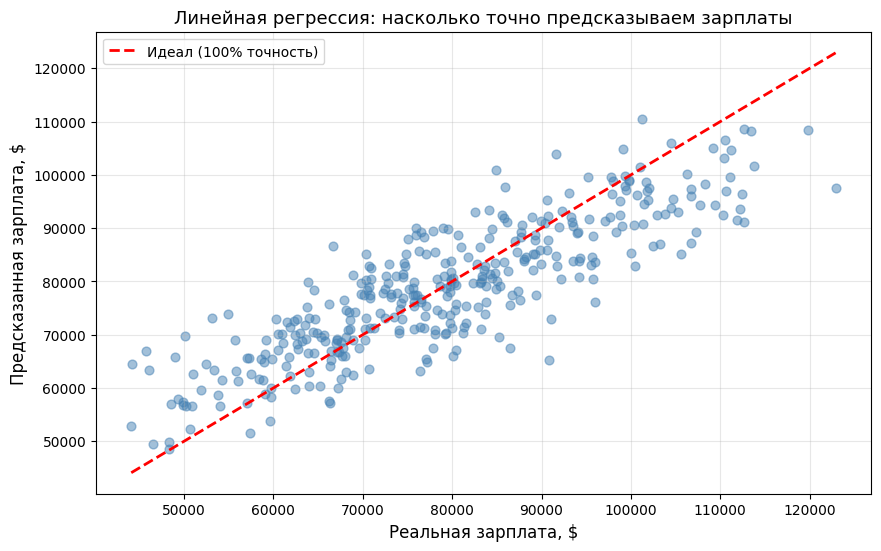

In [70]:
plt.figure(figsize=(10, 6))

plt.scatter(predictions_table['Реальная зарплата'], 
            predictions_table['Предсказанная зарплата'],
            alpha=0.5, color='steelblue', s=40)

# линия 45 градусов
min_val = predictions_table['Реальная зарплата'].min()
max_val = predictions_table['Реальная зарплата'].max()
plt.plot([min_val, max_val], [min_val, max_val], 
         'r--', linewidth=2, label='Идеал (100% точность)')

plt.xlabel('Реальная зарплата, $', fontsize=12)
plt.ylabel('Предсказанная зарплата, $', fontsize=12)
plt.title('Линейная регрессия: насколько точно предсказываем зарплаты', fontsize=13)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

График показывает, что точки группируются вдоль диагонали, но есть заметный разброс. В некоторых областях модель систематически недооценивает или переоценивает зарплату. Возможно, нелинейные зависимости, которые линейная регрессия не улавливает. Попробую дерево решений — оно лучше работает с нелинейностями.

#### 3.9. Визуализация качества предсказаний

In [71]:
from sklearn.tree import DecisionTreeRegressor

tree_reg_model = DecisionTreeRegressor(random_state=42)
tree_reg_model.fit(X_train_scaled, y_train_sal)

y_pred_tree = tree_reg_model.predict(X_test_scaled)

mae_tree = mean_absolute_error(y_test_sal, y_pred_tree)
mse_tree = mean_squared_error(y_test_sal, y_pred_tree)
rmse_tree = np.sqrt(mse_tree)
r2_tree = r2_score(y_test_sal, y_pred_tree)

comparison_metrics = pd.DataFrame({
    'Линейная регрессия': [mae_linreg, mse_linreg, rmse_linreg, r2_linreg],
    'Дерево решений': [mae_tree, mse_tree, rmse_tree, r2_tree]
}, index=['MAE', 'MSE', 'RMSE', 'R²'])

print("Сравнение моделей")
comparison_metrics

Сравнение моделей


Линейная регрессия  Дерево решений
MAE         6.794737e+03    1.040271e+04
MSE         7.272259e+07    1.656430e+08
RMSE        8.527754e+03    1.287024e+04
R²          7.261281e-01    3.761918e-01

#### 3.10. Применение альтернативного метода - дерево решений

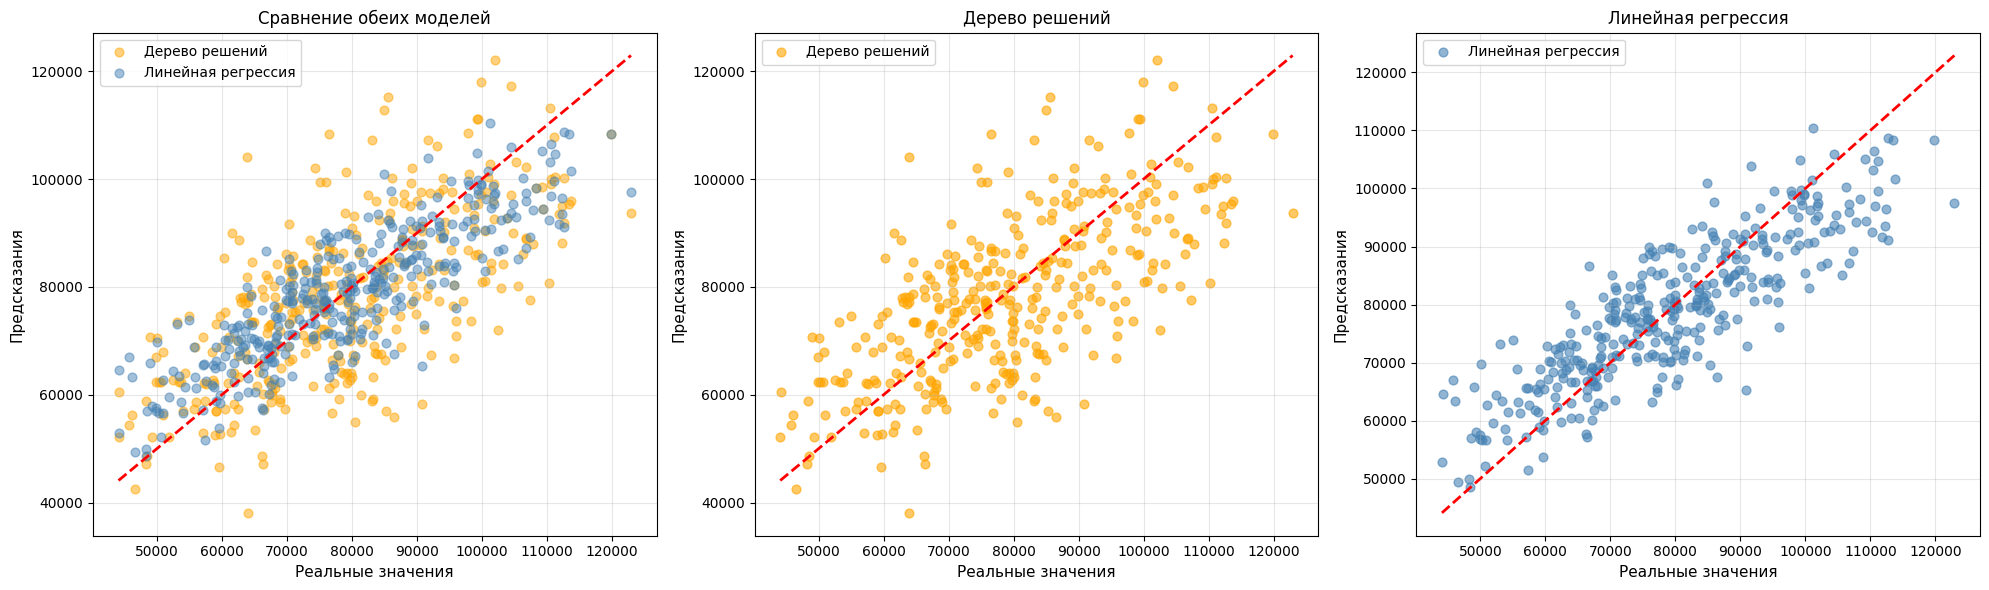

In [72]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# график 1 обе модели на одном графике
axes[0].scatter(y_test_sal, y_pred_tree, color='orange', alpha=0.5, s=40, 
                label='Дерево решений')
axes[0].scatter(y_test_sal, y_pred_linreg, color='steelblue', alpha=0.5, s=40, 
                label='Линейная регрессия')
axes[0].plot([y_test_sal.min(), y_test_sal.max()], 
             [y_test_sal.min(), y_test_sal.max()], 
             'r--', linewidth=2)
axes[0].set_xlabel('Реальные значения', fontsize=11)
axes[0].set_ylabel('Предсказания', fontsize=11)
axes[0].set_title('Сравнение обеих моделей', fontsize=12)
axes[0].legend()
axes[0].grid(alpha=0.3)

# график 2 только дерево решений
axes[1].scatter(y_test_sal, y_pred_tree, color='orange', alpha=0.6, s=40, 
                label='Дерево решений')
axes[1].plot([y_test_sal.min(), y_test_sal.max()], 
             [y_test_sal.min(), y_test_sal.max()], 
             'r--', linewidth=2)
axes[1].set_xlabel('Реальные значения', fontsize=11)
axes[1].set_ylabel('Предсказания', fontsize=11)
axes[1].set_title('Дерево решений', fontsize=12)
axes[1].legend()
axes[1].grid(alpha=0.3)

# график 3 только линейная регрессия
axes[2].scatter(y_test_sal, y_pred_linreg, color='steelblue', alpha=0.6, s=40, 
                label='Линейная регрессия')
axes[2].plot([y_test_sal.min(), y_test_sal.max()], 
             [y_test_sal.min(), y_test_sal.max()], 
             'r--', linewidth=2)
axes[2].set_xlabel('Реальные значения', fontsize=11)
axes[2].set_ylabel('Предсказания', fontsize=11)
axes[2].set_title('Линейная регрессия', fontsize=12)
axes[2].legend()
axes[2].grid(alpha=0.3)

plt.tight_layout()
plt.show()

#### 3.11. Сравнительный анализ моделей

Сравнение результатов линейной регрессии и дерева решений выявило существенное превосходство первой модели:

**Результаты линейной регрессии:**
- Коэффициент детерминации R² = 0.73 значительно превышает показатель дерева решений (R² = 0.38)
- Значения метрик ошибок (MAE, RMSE) существенно ниже
- Визуализация демонстрирует более плотную группировку предсказаний вдоль диагонали идеальной модели

**Результаты дерева решений:**
- R² = 0.38 указывает на объяснение менее половины дисперсии целевой переменной
- Повышенные значения ошибок
- Значительный разброс предсказаний относительно истинных значений

**Возможные причины различий в качестве моделей:**

1. Наличие преимущественно линейных зависимостей в данных (опыт работы - заработная плата, предыдущий доход - текущая заработная плата)
2. Возможное переобучение модели дерева решений при использовании параметров по умолчанию без ограничения глубины
3. Недостаточное количество данных или признаков для эффективного разделения признакового пространства деревом решений

**Заключение:**
Для данного набора данных линейная регрессия демонстрирует оптимальное соотношение простоты модели и качества предсказаний. Применение более сложных алгоритмов требует тщательной настройки гиперпараметров для достижения конкурентных результатов.

### Вывод

В ходе выполнения лабораторной работы были изучены и практически применены различные методы регрессионного анализа.

**Часть 1: Простая линейная регрессия**

Исследование простой линейной регрессии продемонстрировало критическую важность выбора информативных признаков. Признак x1 показал полную непригодность для линейного моделирования с отрицательным значением коэффициента детерминации (R² ≈ -0.009), что свидетельствует о качестве предсказаний ниже базового уровня. В противоположность этому, признак x2 обеспечил приемлемое качество модели (R² ≈ 0.73), демонстрируя выраженную линейную зависимость с целевой переменной.

Визуальный анализ оказался эффективным инструментом для предварительной оценки наличия зависимостей. Графики рассеяния наглядно показали различия: для x1 наблюдается хаотичное распределение точек с практически горизонтальной линией регрессии, тогда как для x2 точки формируют чёткий линейный тренд. Данный опыт подтверждает целесообразность предварительной визуализации данных перед построением моделей.

**Часть 2: Полиномиальная регрессия**

Экспериментальное исследование различных степеней полинома выявило важность баланса между сложностью модели и её обобщающей способностью. Полином степени 16 продемонстрировал признаки переобучения с избыточными осцилляциями кривой (R² ≈ 0.20). Снижение степени до 7 привело к улучшению метрик качества (R² ≈ 0.22) при сохранении визуально адекватной формы кривой.

Можно выделить следующую закономерность: недостаточная степень полинома приводит к недообучению модели, не позволяя улавливать нелинейные зависимости, в то время как избыточная степень вызывает переобучение с запоминанием шумовых компонент данных. Оптимальная степень полинома требует эмпирического подбора для конкретного набора данных, обычно находясь в диапазоне 3-10.

Следует отметить, что даже оптимизированная полиномиальная модель для признака x1 существенно уступала простой линейной регрессии для признака x2 (R² 0.22 против 0.73), что указывает на принципиально различную информативность признаков.

**Часть 3: Прогнозирование заработной платы**

Работа с реальным набором данных потребовала применения комплексного подхода к предобработке. Обнаружение множественных выбросов потребовало их обработки методом межквартильного размаха (IQR). Несмотря на сокращение объёма выборки, данная процедура способствовала улучшению нормальности распределения и повышению качества обучения модели.

Модель линейной регрессии показала хорошее качество с R² ≈ 0.73. Анализ коэффициентов модели выявил ключевые факторы влияния на заработную плату: опыт работы (experience) и предыдущий доход (income) продемонстрировали наибольшие коэффициенты, что соответствует экономической логике формирования заработной платы на рынке труда. Признаки distance_to_work и savings показали минимальное влияние с коэффициентами, близкими к нулю.

Сравнение с моделью дерева решений выявило превосходство линейной регрессии (R² ≈ 0.73 против 0.38). Данный результат объясняется преобладанием линейных зависимостей в данных, а также возможным переобучением дерева решений при использовании параметров по умолчанию.

**Общие выводы:**

1. Визуализация данных является необходимым этапом предварительного анализа, позволяющим оценить характер зависимостей до построения моделей.

2. Принцип парсимонии (бритва Оккама) находит подтверждение: более простая модель может превосходить сложную при наличии преимущественно линейных зависимостей в данных.

3. Информативность признаков существенно различается: некоторые признаки (x1) не содержат полезной информации, тогда как другие (experience) являются критически важными.

4. Качественная предобработка данных, включая обработку выбросов, оказывает значительное влияние на результаты моделирования.

5. Гиперпараметры моделей требуют тщательного подбора. Параметры по умолчанию не всегда обеспечивают оптимальное качество.

**Направления дальнейших исследований:**

При наличии дополнительного времени целесообразно было бы:
- Применить кодирование категориальных признаков (education, city, job_type) для оценки их влияния на качество модели
- Провести оптимизацию гиперпараметров дерева решений с использованием GridSearchCV или кросс-валидации
- Исследовать ансамблевые методы (случайный лес, градиентный бустинг)
- Построить корреляционную матрицу для анализа взаимосвязей между всеми признаками

Выполнение данной лабораторной работы способствовало глубокому пониманию различных методов регрессионного анализа, их преимуществ и ограничений, а также практических аспектов их применения.